<a href="https://colab.research.google.com/github/kalmuroth/lb-cml/blob/main/lb_cml_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Simple Linear Regression for salary prediction**

In [80]:
import numpy as np
X=np.array([0,3,6,8])
Y=np.array([35,45,65,80])

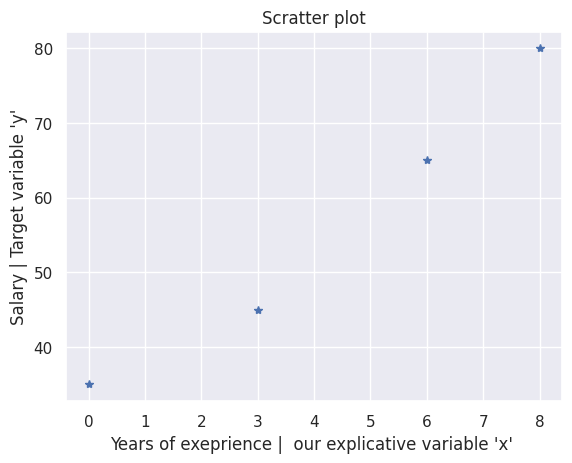

In [81]:
import matplotlib.pyplot as plt
plt.plot(X,Y,'*')
plt.xlabel("Years of exeprience |  our explicative variable 'x' ")
plt.ylabel("Salary | Target variable 'y'")
plt.title("Scratter plot")
plt.savefig("./intuitive_scatter.png")

In [82]:
def reg_plot(x,y,m):
    plt.scatter(x,y,c='blue',label="our data")
    plt.plot(x, m.predict(x.reshape(-1, 1)), color='red',label="prediction curve")
    plt.xlabel("explicative variable 'x' ")
    plt.ylabel("target variable 'y'")
    plt.legend()
    return None

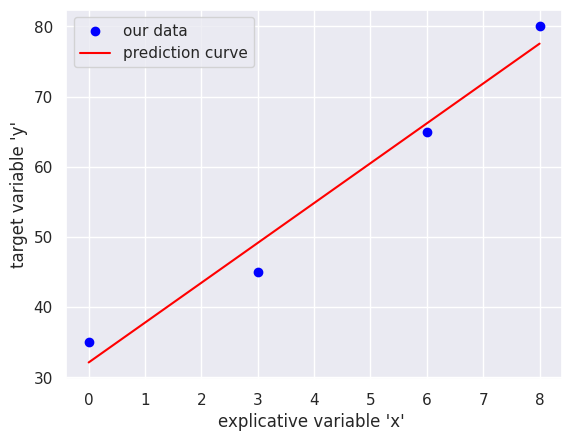

In [83]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X.reshape(-1, 1),Y)
reg_plot(X,Y,linear_model)
plt.savefig("./approche_intuitive.png")

In [84]:
import numpy as np
x=np.arange(75)
delta = np.random.uniform(-10,10, size=(75,))
y = 0.4 * x +3 + delta

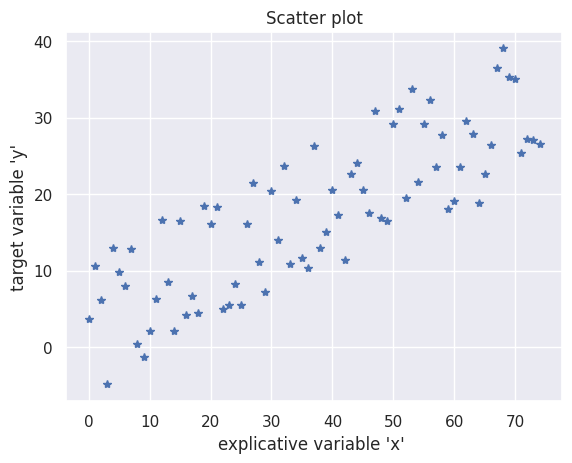

In [85]:
plt.plot(x,y,"*")
plt.xlabel("explicative variable 'x' ")
plt.ylabel("target variable 'y'")
plt.title("Scatter plot")
plt.savefig("./intuitive_scatter_bis.png")

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
linear_model = LinearRegression()

In [88]:
#we are using the reshape function to convert the 1D array to a 2D array which is an obligation in scikit-learn LinearRegression() cf official doc
linear_model.fit(x.reshape(-1, 1),y)

LinearRegression()

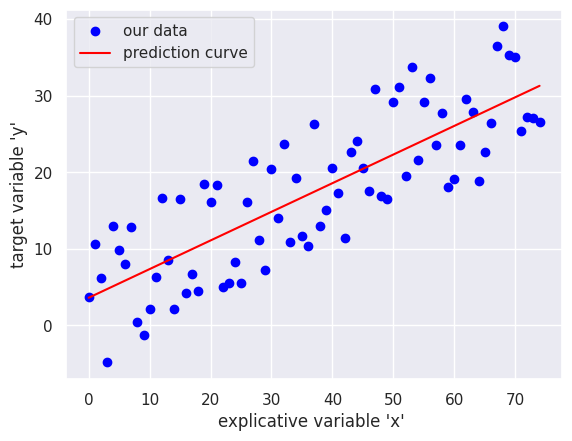

In [89]:
reg_plot(x,y,linear_model)
plt.savefig("./prediction.png")

### **Multiple Linear Regression for AirBnB prediction**

In [90]:
#importer vos librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model #modèle linéaire
from sklearn.metrics import mean_squared_error, r2_score #métriques d'évaluation


In [91]:
#charger les données
#price_availability.csv
#listings_final.csv
#attention l'individu 589 n'a pas de prix !!
prices = pd.read_csv("./drive/MyDrive/notebook/price_availability.csv", sep=";")
listings = pd.read_csv("./drive/MyDrive/notebook/listings_final.csv", sep=";")
listings = listings.drop(589)
print("Data loaded.")
listings


Data loaded.


,Unnamed: 0,listing_id,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1,1,1,2.0,False,True,True,False,False,1.00,1.00
1,1,661961,studio PARIS PLACE EDITH PIAF 75020,entire_home,Paris,NaN,48.867284,2.403255,2,1,1,1.0,False,False,True,True,False,0.88,0.69
2,2,1261705,chambre privée à louer @ paris oberkampf,private_room,Paris,NaN,48.867894,2.375897,1,1,1,1.0,False,False,True,True,False,1.00,1.00
3,3,1318834,Appartement au coeur du Marais,entire_home,Paris,République,48.870370,2.358510,3,2,2,1.0,False,False,True,False,False,0.82,0.48
4,4,1677091,Lovely & Quiet flat,entire_home,Paris,Buttes-Chaumont - Belleville,48.874149,2.373700,2,1,1,1.0,False,False,True,True,False,0.95,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,28335197,Studio cosy Jardin du Luxembourg,entire_home,Paris,Saint Germain des Prés - Odéon,48.848695,2.325857,2,1,0,1.0,False,True,True,False,False,0.79,1.00
996,996,28583013,Charmant 30m2 - Faubourg Saint Martin,entire_home,Paris,République,48.871623,2.358006,3,1,1,1.0,False,True,True,False,False,1.00,1.00
997,997,28628316,Cosy flat in the marais - Best area,entire_home,Paris,2e arrondissement,48.867434,2.351771,4,2,1,1.0,False,True,True,True,False,1.00,1.00
998,998,28792796,Appartement 3 chambres madeleine.,entire_home,Paris,Madeleine - Vendôme,48.870109,2.321475,6,4,2,1.5,False,True,True,False,False,1.00,1.00


In [92]:
#define our input variable X and output variable Y
X = listings.loc[:, ["listing_id", "person_capacity", "bedrooms", "bathrooms" ]]
Y = []

In [93]:
#build the price vector
for i, row in X.iterrows():
    y = 0
    ID = int(row["listing_id"])
    subset = prices[prices["listing_id"] == ID]
    y = subset["local_price"].mean()
    Y.append(y)

#convert into numpy array
Y = np.asarray(Y)

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((699, 4), (699,), (300, 4), (300,))

In [95]:
regr = linear_model.LinearRegression()
regr.fit(X_train.values, y_train)

LinearRegression()

In [96]:
#what do you think about the results ?
print('Coefficients beta_j : \n', regr.coef_)
#contribution de chaque variable indépendante
print('Coefficients INTERCEPT beta_0 : \n', regr.intercept_)
#value of Y when X=0

Coefficients beta_j : 
 [2.47834609e-06 3.23451085e+01 1.43887639e+01 7.75318453e+01]
Coefficients INTERCEPT beta_0 : 
 -79.79953133672868


In [97]:
X_test

,listing_id,person_capacity,bedrooms,bathrooms
453,14992207,2,1,1.0
794,24564156,2,1,1.0
209,3452604,2,0,1.0
309,8243908,1,1,1.0
741,23233753,5,2,1.0
...,...,...,...,...
314,8525469,8,3,2.5
404,12976143,7,3,2.0
7,5662637,2,1,1.0
155,2158913,2,0,1.0


In [98]:
y_test

array([  79.81038961,  125.        ,   95.45333333,   29.        ,
         82.5883905 ,  123.63829787,  360.        ,  130.        ,
        450.        ,  164.845953  ,   68.35142119,  294.18181818,
         68.08247423,   51.01595745,  170.30548303,   80.24479167,
         73.78249337,  195.        ,  375.0268714 ,  834.96124031,
        850.65633075,   89.        ,  650.        ,   63.38219895,
         83.        ,  190.        ,  202.23514212,   96.6056701 ,
        108.95026178,   50.        ,   28.31937173,  195.        ,
         93.70234987,  474.14258189,  450.        ,  517.0984456 ,
         83.37730871,  395.        ,   79.        ,  129.17493473,
        135.11227154,   51.52785146,  117.22572178,  260.        ,
        618.        ,   42.        ,  180.        ,  160.        ,
        179.67315175,   40.0025641 ,   80.984375  ,  116.09947644,
        429.28645833,   76.06896552,  219.5037594 ,  459.71391076,
        183.0848329 ,  204.39276486,  161.5503876 ,  131.     

In [99]:
#compute y_pred
Y_pred = regr.predict(X_test)
len(Y_pred)

300

In [100]:
Y_pred

array([113.96717254, 137.68977495,  70.97927863,  64.89744358,
       245.81666527, 170.4788043 , 561.0179989 , 106.9418946 ,
       383.27653253, 233.75294378, 162.22364018, 612.08191179,
       159.32890963, 251.58804631, 118.1210298 ,  78.77744367,
       124.68010657, 194.48881109, 434.03826221, 790.83639952,
       586.83384388, 171.78524314, 221.95377062, 128.08854869,
       128.62279089, 175.3227481 , 121.6775822 , 154.48438242,
       156.15601944,  69.49655503,  92.87029058, 216.30267547,
       112.59683353, 754.37308581, 455.87067501, 287.66991756,
        67.79340934, 359.1764754 , 129.24823819, 214.40674172,
       169.73401224,  60.79931294, 209.06281997, 236.21743727,
       320.30632589, 123.62663053,  77.81376409, 198.81582295,
        78.94863791, 145.15976783, 127.84082014, 152.26503044,
       224.58908772,  69.26447379, 298.66775754, 164.39766518,
       214.32584501, 185.47409534, 218.11339591, 119.70295068,
        77.9772229 , 169.06272431, 141.63669477, 263.08

In [101]:
y_test

array([  79.81038961,  125.        ,   95.45333333,   29.        ,
         82.5883905 ,  123.63829787,  360.        ,  130.        ,
        450.        ,  164.845953  ,   68.35142119,  294.18181818,
         68.08247423,   51.01595745,  170.30548303,   80.24479167,
         73.78249337,  195.        ,  375.0268714 ,  834.96124031,
        850.65633075,   89.        ,  650.        ,   63.38219895,
         83.        ,  190.        ,  202.23514212,   96.6056701 ,
        108.95026178,   50.        ,   28.31937173,  195.        ,
         93.70234987,  474.14258189,  450.        ,  517.0984456 ,
         83.37730871,  395.        ,   79.        ,  129.17493473,
        135.11227154,   51.52785146,  117.22572178,  260.        ,
        618.        ,   42.        ,  180.        ,  160.        ,
        179.67315175,   40.0025641 ,   80.984375  ,  116.09947644,
        429.28645833,   76.06896552,  219.5037594 ,  459.71391076,
        183.0848329 ,  204.39276486,  161.5503876 ,  131.     

In [102]:
#afficher l'erreur des moindres carrées sur l'ensemble d'entrainement ainsi que le R2
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, Y_pred))
# Coefficient de détermination R2
print('Variance score: %.2f' % r2_score(y_test, Y_pred))

Mean squared error: 19631.83
Variance score: 0.42


In [103]:
#compute the RMSE for more intuitive results
np.sqrt(19631.83)

140.1136324559463

### **Bonus: Homoscedasticity analysis**

In [104]:
H = np.matmul(X_train.values, np.linalg.solve(np.dot(X_train.T.values, X_train.values), X_train.T.values))

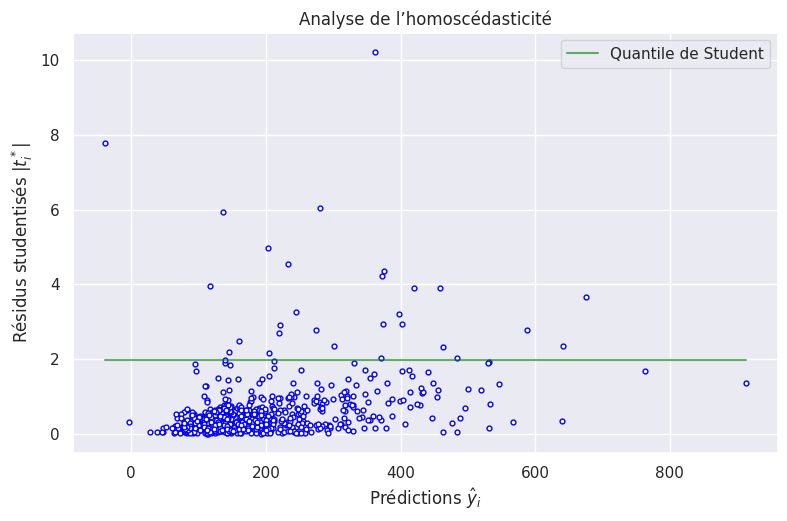

In [105]:
import scipy
Y_pred = regr.predict(X_train)
n = X_train.shape[0]
p = 4
residuals = np.abs(y_train - Y_pred)
H = np.matmul(X_train.values, np.linalg.solve(np.dot(X_train.T.values, X_train.values), X_train.T.values))
std_hat = np.dot(residuals, residuals) / (n - p)
standart_residuals = np.asarray([residuals[i] / np.sqrt(std_hat * (1 - H[i, i])) for i in range(len(residuals))])
student_residuals = np.asarray([ standart_residuals[i] * np.sqrt((n - p - 1) / (n - p - standart_residuals[i]**2)) for i in range(n) ])
cook = np.asarray([ H[i, i] * student_residuals[i] / (X_train.shape[1] * (1 - H[i, i])) for i in range(n) ])

plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.scatter(Y_pred, student_residuals, s=12, c="white", edgecolors="blue")
plt.plot([min(Y_pred), max(Y_pred)], [ scipy.stats.t.ppf(q=0.975, df=n-p-1), scipy.stats.t.ppf(q=0.975, df=n-p-1)], color="green", alpha=0.6, label="Quantile de Student")
plt.title("Analyse de l’homoscédasticité")
plt.xlabel("Prédictions $\hat{y}_i$")
plt.ylabel("Résidus studentisés $|t_i^*|$")
plt.legend()

### Implementing Polynomial Regression with dummy data

In [106]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter("ignore")

# Generate sample data
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Calculate AIC
n = len(y)
k = len(model.coef_) + 1  # Adding 1 for the intercept
mse = np.mean((model.predict(X) - y)**2)
log_likelihood = -n/2 * np.log(2 * np.pi * mse) - n/2
aic = 2*k - 2*log_likelihood
print(f"AIC for Linear Regression: {aic}")

AIC for Linear Regression: -213.37025056344726


In [107]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=12)
X_poly = poly.fit_transform(X)

# Fit the model
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# Calculate AIC for polynomial regression
k_poly = len(model_poly.coef_)
mse_poly = np.mean((model_poly.predict(X_poly) - y)**2)
log_likelihood_poly = -n/2 * np.log(2 * np.pi * mse_poly) - n/2
aic_poly = 2*k_poly - 2*log_likelihood_poly
print(f"AIC for Polynomial Regression: {aic_poly}")

AIC for Polynomial Regression: -205.04886623683967


In [108]:
#load the libraries and titanic data (libraries already loaded)
#you can find it here :  https://www.kaggle.com/c/titanic/data
train = pd.read_csv("./drive/MyDrive/notebook/train.csv", sep=",")
gender = pd.read_csv('./drive/MyDrive/notebook/gender_submission.csv', sep=",")
test = pd.read_csv('./drive/MyDrive/notebook/test.csv', sep=",")
print("Data loaded.")

Data loaded.


In [109]:
#print the dataset shape
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [110]:
#print the dataset shape
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


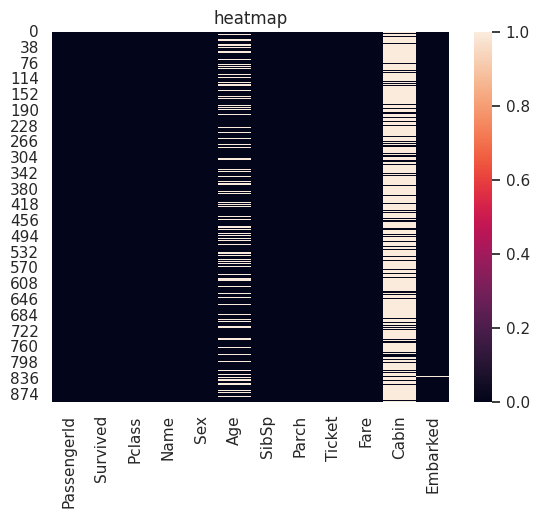

In [111]:
#plot the NaN values with a heatmap
sns.heatmap(train.isnull())
plt.title('heatmap')
plt.show()

In [112]:
#print the age % of NaN values
rows = len(train)
total = train['Age'].isnull().sum()
missing_percentage = str(round((total / rows) * 100,2))

print("Il y a " + missing_percentage +"% d'age qui manquent ")

Il y a 19.87% d'age qui manquent 


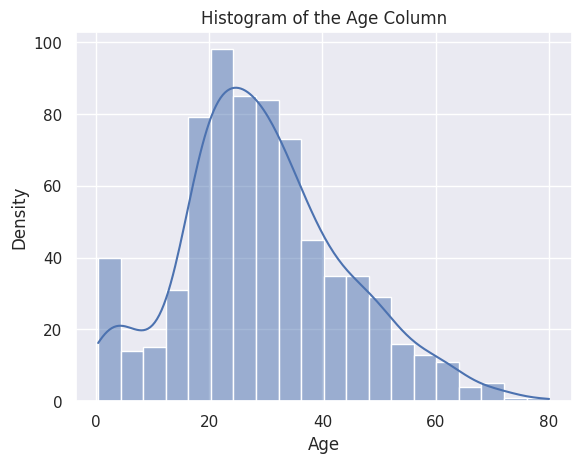

In [113]:
#print the histogram of the age column
plt.figure()
ax = sns.histplot(train['Age'].dropna(), kde=True)
plt.xticks([0, 20, 40, 60, 80], ['0', '20', '40', '60', '80'])
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Histogram of the Age Column')
plt.show()

In [114]:
#print the median and the mean of the age column
age_median = train['Age'].median()
age_mean = round(train['Age'].mean(), 2)
print("moyenne : " , age_mean)
print("medianne : " , age_median)

moyenne :  29.7
medianne :  28.0


In [115]:
#print the cabin % of NaN values
rows = len(train)
total = train['Cabin'].isnull().sum()
missing_percentage = str(round((total / rows) * 100,2))

print("Il y a " + missing_percentage +"% de Cabin qui manquent")

Il y a 77.1% de Cabin qui manquent


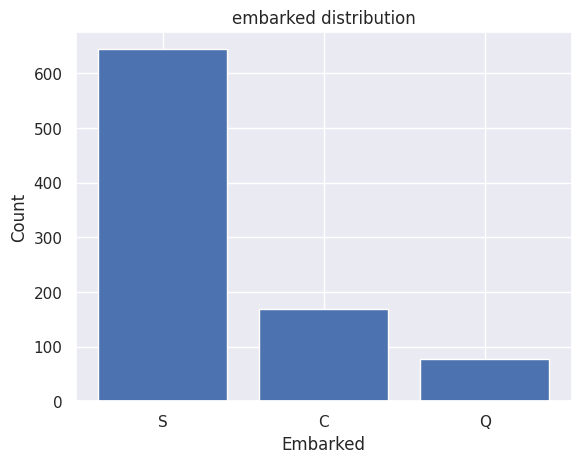

In [116]:
#print the embarked distribution
embarkation  = train['Embarked'].value_counts()
plt.bar(embarkation .index, embarkation .values)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('embarked distribution')
plt.show()


In [117]:
#apply the preprocessing like above
age_preprocessing = train['Age'].median()
train['Age'].fillna(age_preprocessing, inplace=True)

embarked_preprocessing  = train['Embarked'].mode()[0]
train['Embarked'].fillna(embarked_preprocessing, inplace=True)

original_train = pd.read_csv("./drive/MyDrive/notebook/train.csv", sep=",")


In [118]:
#verify your results
columns_to_exclude = ['Cabin']
columns_with_missing_values = train.columns.difference(columns_to_exclude)
missing_value_counts = train[columns_with_missing_values].isnull().sum()
print(missing_value_counts)

Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
dtype: int64


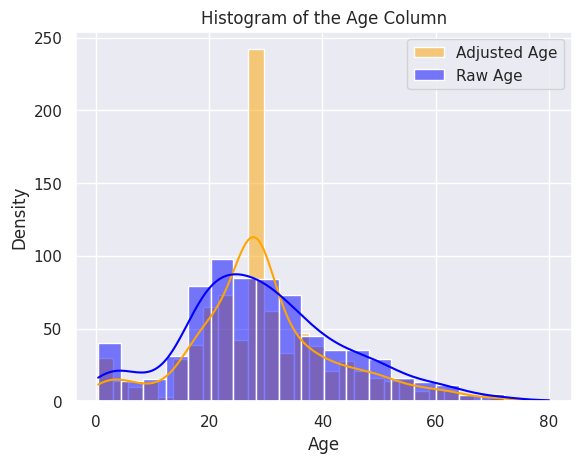

In [119]:
#print the histogram of the age column after and before processing
plt.figure()
sns.set(style='darkgrid')
sns.histplot(train['Age'].dropna(), kde=True, color='orange', label='Adjusted Age')
sns.histplot(original_train['Age'].dropna(), kde=True, color='blue', label='Raw Age')
plt.xticks([0, 20, 40, 60, 80], ['0', '20', '40', '60', '80'])
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Histogram of the Age Column')
plt.legend()
plt.show()

In [120]:
#create the feature 'TravelAlone'
from tabulate import tabulate
original_train['travelAlone'] = original_train.apply(lambda row: int(row['SibSp'] + row['Parch'] == 0), axis=1)
print(tabulate(original_train.head(), headers='keys', tablefmt='pretty'))

+---+-------------+----------+--------+-----------------------------------------------------+--------+------+-------+-------+------------------+---------+-------+----------+-------------+
|   | PassengerId | Survived | Pclass |                        Name                         |  Sex   | Age  | SibSp | Parch |      Ticket      |  Fare   | Cabin | Embarked | travelAlone |
+---+-------------+----------+--------+-----------------------------------------------------+--------+------+-------+-------+------------------+---------+-------+----------+-------------+
| 0 |      1      |    0     |   3    |               Braund, Mr. Owen Harris               |  male  | 22.0 |   1   |   0   |    A/5 21171     |  7.25   |  nan  |    S     |      0      |
| 1 |      2      |    1     |   1    | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female | 38.0 |   1   |   0   |     PC 17599     | 71.2833 |  C85  |    C     |      0      |
| 2 |      3      |    1     |   3    |               Heikki

In [121]:
#use the get_dummies function to encode every needed features
data = pd.get_dummies(original_train, columns=['Pclass', 'Embarked', 'Sex'], drop_first=False)
print(tabulate(data.head(), headers='keys', tablefmt='pretty'))

+---+-------------+----------+-----------------------------------------------------+------+-------+-------+------------------+---------+-------+-------------+----------+----------+----------+------------+------------+------------+------------+----------+
|   | PassengerId | Survived |                        Name                         | Age  | SibSp | Parch |      Ticket      |  Fare   | Cabin | travelAlone | Pclass_1 | Pclass_2 | Pclass_3 | Embarked_C | Embarked_Q | Embarked_S | Sex_female | Sex_male |
+---+-------------+----------+-----------------------------------------------------+------+-------+-------+------------------+---------+-------+-------------+----------+----------+----------+------------+------------+------------+------------+----------+
| 0 |      1      |    0     |               Braund, Mr. Owen Harris               | 22.0 |   1   |   0   |    A/5 21171     |  7.25   |  nan  |      0      |    0     |    0     |    1     |     0      |     0      |     1      |     

In [122]:
#drop the columns that you don't need
remove_column = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Sex_female'])
print(tabulate(remove_column, headers='keys', tablefmt='pretty'))

+-----+----------+------+-------+-------+----------+-----------------+-------------+----------+----------+----------+------------+------------+------------+----------+
|     | Survived | Age  | SibSp | Parch |   Fare   |      Cabin      | travelAlone | Pclass_1 | Pclass_2 | Pclass_3 | Embarked_C | Embarked_Q | Embarked_S | Sex_male |
+-----+----------+------+-------+-------+----------+-----------------+-------------+----------+----------+----------+------------+------------+------------+----------+
|  0  |    0     | 22.0 |   1   |   0   |   7.25   |       nan       |      0      |    0     |    0     |    1     |     0      |     0      |     1      |    1     |
|  1  |    1     | 38.0 |   1   |   0   | 71.2833  |       C85       |      0      |    1     |    0     |    0     |     1      |     0      |     0      |    0     |
|  2  |    1     | 26.0 |   0   |   0   |  7.925   |       nan       |      1      |    0     |    0     |    1     |     0      |     0      |     1      |    

In [123]:
#print the null value of this dataset
columns_to_exclude = ['Cabin']
columns_with_missing_values = train.columns.difference(columns_to_exclude)
missing_value_counts = train[columns_with_missing_values].isnull().sum()
print(missing_value_counts)

Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
dtype: int64


In [124]:
#do the same thing for the test dataset
train['Age'].fillna(train['Age'].median(), inplace=True)
most_common_embarked_train = train['Embarked'].value_counts().idxmax()
train['Embarked'].fillna(most_common_embarked_train, inplace=True)
train['Fare'].fillna(train['Fare'].median(), inplace=True)
train['travelAlone'] = train.apply(lambda row: int(row['SibSp'] + row['Parch'] == 0), axis=1)
data_test = pd.get_dummies(train, columns=['Pclass', 'Embarked', 'Sex'], drop_first=False)
remove_column_test = data_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Sex_female'])
print(tabulate(remove_column, headers='keys', tablefmt='pretty'))

+-----+----------+------+-------+-------+----------+-----------------+-------------+----------+----------+----------+------------+------------+------------+----------+
|     | Survived | Age  | SibSp | Parch |   Fare   |      Cabin      | travelAlone | Pclass_1 | Pclass_2 | Pclass_3 | Embarked_C | Embarked_Q | Embarked_S | Sex_male |
+-----+----------+------+-------+-------+----------+-----------------+-------------+----------+----------+----------+------------+------------+------------+----------+
|  0  |    0     | 22.0 |   1   |   0   |   7.25   |       nan       |      0      |    0     |    0     |    1     |     0      |     0      |     1      |    1     |
|  1  |    1     | 38.0 |   1   |   0   | 71.2833  |       C85       |      0      |    1     |    0     |    0     |     1      |     0      |     0      |    0     |
|  2  |    1     | 26.0 |   0   |   0   |  7.925   |       nan       |      1      |    0     |    0     |    1     |     0      |     0      |     1      |    

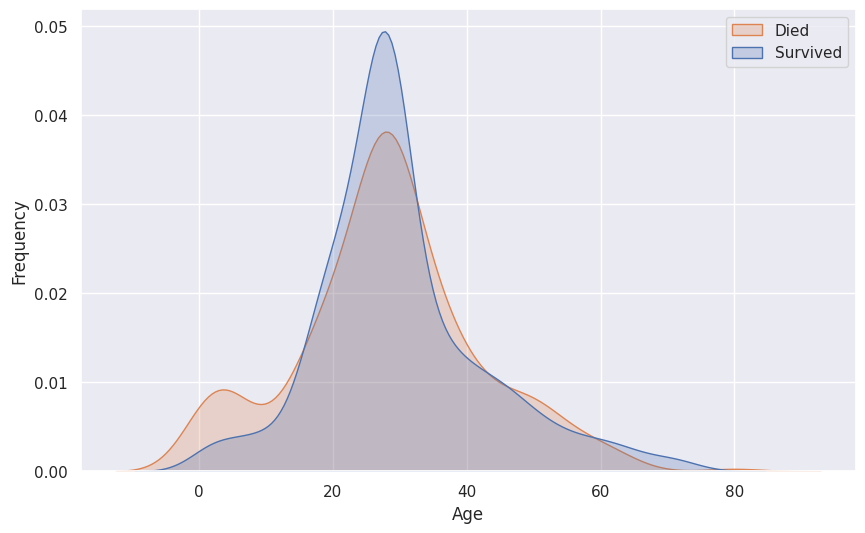

In [125]:
#print the age feature distribution and highlight the survived feature
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=remove_column_test, x='Age', hue='Survived', fill=True, common_norm=False)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(labels=["Died", "Survived"])
plt.savefig("age_feature_distributio.png")

In [126]:
#add the "IsMinor" variable to your data (a person is considered a minor if they are under 16)
data = pd.get_dummies(train, columns=['Pclass', 'Embarked', 'Sex'], drop_first=False)
data['IsMinor'] = (data['Age'] < 16).astype(int)
print(tabulate(data.head(), headers='keys', tablefmt='pretty'))

+---+-------------+----------+-----------------------------------------------------+------+-------+-------+------------------+---------+-------+-------------+----------+----------+----------+------------+------------+------------+------------+----------+---------+
|   | PassengerId | Survived |                        Name                         | Age  | SibSp | Parch |      Ticket      |  Fare   | Cabin | travelAlone | Pclass_1 | Pclass_2 | Pclass_3 | Embarked_C | Embarked_Q | Embarked_S | Sex_female | Sex_male | IsMinor |
+---+-------------+----------+-----------------------------------------------------+------+-------+-------+------------------+---------+-------+-------------+----------+----------+----------+------------+------------+------------+------------+----------+---------+
| 0 |      1      |    0     |               Braund, Mr. Owen Harris               | 22.0 |   1   |   0   |    A/5 21171     |  7.25   |  nan  |      0      |    0     |    0     |    1     |     0      | 

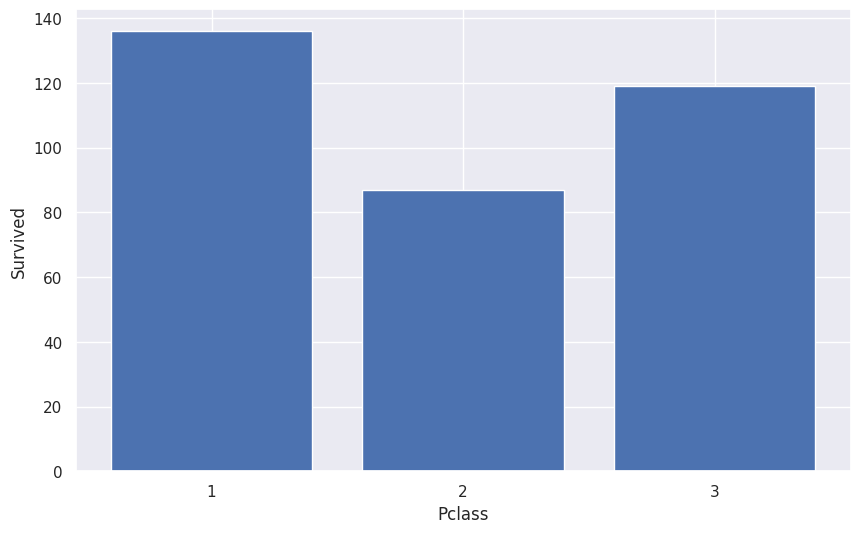

In [127]:
#show survivors by class
survivors_by_class = [data[data[f'Pclass_{i}'] == 1]['Survived'].sum() for i in range(1, 4)]
column = ['1', '2', '3']
plt.figure(figsize=(10, 6))
plt.bar(column, survivors_by_class)
plt.xlabel('Pclass')
plt.ylabel('Survived')

plt.show()

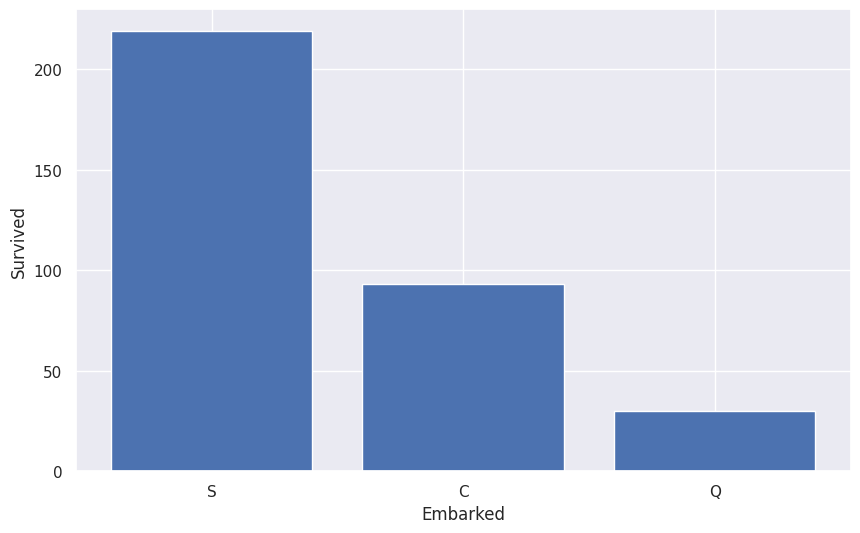

In [128]:
#do the same for embarked feature
survivors_by_embarked = [data[data[f'Embarked_{port}'] == 1]['Survived'].sum() for port in ['S', 'C', 'Q']]
ports = ['S', 'C', 'Q']
plt.figure(figsize=(10, 6))
plt.bar(ports, survivors_by_embarked)
plt.xlabel('Embarked')
plt.ylabel('Survived')

plt.show()

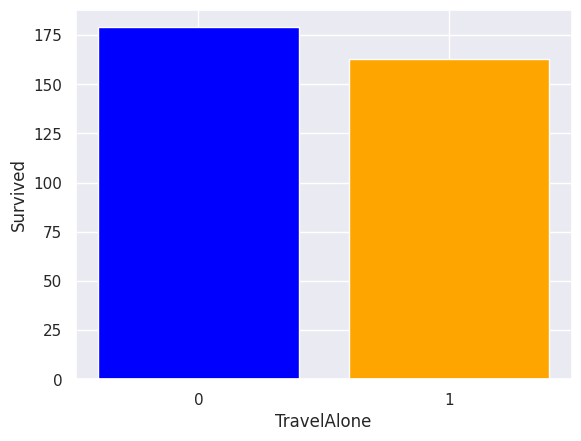

In [129]:
#do the same for the Traveling Alone feature we've created earlier
survivors_by_class = data[['travelAlone', 'Survived']].groupby(['travelAlone']).sum().reset_index()

plt.bar(survivors_by_class.index, survivors_by_class['Survived'], color=['blue', 'orange'])
plt.xlabel('TravelAlone')
plt.ylabel('Survived')
plt.xticks(survivors_by_class.index, ['0', '1'])
plt.show()

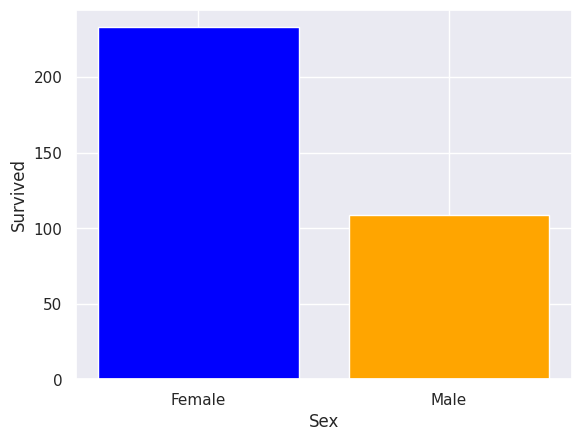

In [130]:
#gender distribution of survivors
survivors_by_sex = data[['Sex_male', 'Survived']].groupby(['Sex_male']).sum().reset_index()

plt.bar(survivors_by_sex['Sex_male'], survivors_by_sex['Survived'], color=['blue', 'orange'])
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.xticks(survivors_by_sex['Sex_male'], ['Female', 'Male'])
plt.show()

In [131]:
#define x and y for the model
array = ['Age','travelAlone','Pclass_1','Pclass_2','Embarked_C','Embarked_S','Sex_male','IsMinor',]
X = data[array]
Y = data['Survived']

In [132]:
#instanciate a LogisticRegression estimator in sklearn
logisticRegression = LogisticRegression()

In [133]:
#create a RFE model and select 4 atribute
rfe = RFE(logisticRegression, n_features_to_select=4)
rfe.fit(X,Y)
selected_features = X.columns[rfe.support_]
print("Les features séléctionnée :", selected_features )

Les features séléctionnée : Index(['Pclass_1', 'Pclass_2', 'Sex_male', 'IsMinor'], dtype='object')


In [134]:
#create a RFE model and select 8 atribute
rfe = RFE(logisticRegression, n_features_to_select=8)
rfe.fit(X,Y)
selected_features = X.columns[rfe.support_]
print("Les features séléctionnée :", selected_features )

Les features séléctionnée : Index(['Age', 'travelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C',
       'Embarked_S', 'Sex_male', 'IsMinor'],
      dtype='object')


In [135]:
#instantiate an RFECV object (with a scoring='accuracy') and do as stated above
rfe = RFECV(logisticRegression, scoring='accuracy')
rfe.fit(X,Y)

print("Optimal number of features: ", rfe.n_features_)
print("Selected features: ", X.columns[rfe.support_])

Optimal number of features:  8
Selected features:  Index(['Age', 'travelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C',
       'Embarked_S', 'Sex_male', 'IsMinor'],
      dtype='object')


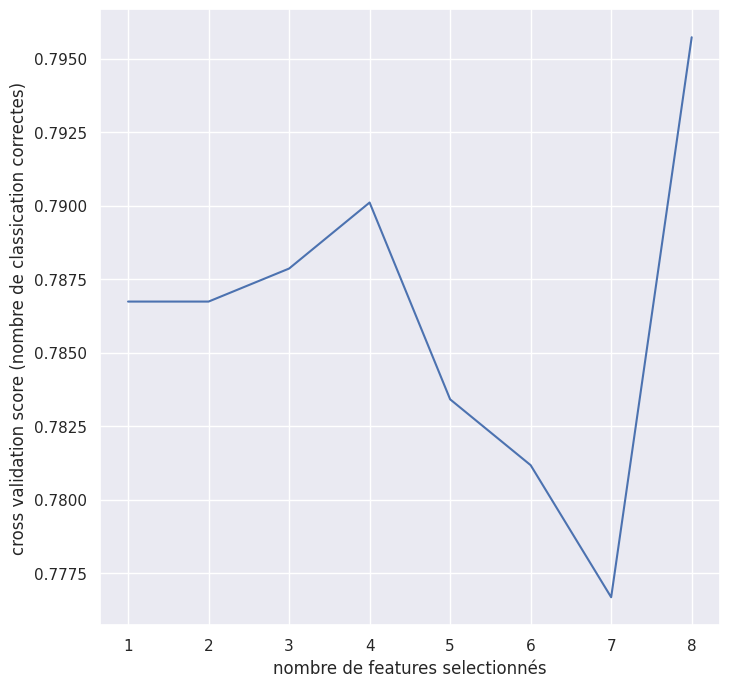

In [136]:
#plot features numbers VS. cross-validation scores
sns.set(style="darkgrid")
plt.figure(figsize=(8, 8))

plt.xlabel("nombre de features selectionnés")
plt.ylabel("cross validation score (nombre de classication correctes)")
plt.plot(range(1, len(rfe.cv_results_['mean_test_score']) + 1), rfe.cv_results_['mean_test_score'])
plt.savefig("age_feature_distributio.png")

In [137]:
#create the new dataframe and print the shape
selected_feature_indices = rfe.support_
selected_X = X.iloc[:, selected_feature_indices]

new_model = LogisticRegression()
new_model.fit(selected_X, Y)

print("Shape of selected_X:", selected_X.shape)
print("Shape of coefficient array:", new_model.coef_[0].shape)

Shape of selected_X: (891, 8)
Shape of coefficient array: (8,)


In [138]:
#split your data with an alpha=20% and a random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (712, 8)
Shape of X_test: (179, 8)
Shape of y_train: (712,)
Shape of y_test: (179,)


In [139]:
#make a prediction on the test set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = logistic_model.predict(X_test)

# Predict probabilities on the testing data
y_pred_prob = logistic_model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print the log loss
logloss = log_loss(y_test, y_pred_prob)
print("Log Loss:", logloss)

# Calculate and print the AUC score
auc = roc_auc_score(y_test, y_pred_prob[:, 1])
print("AUC:", auc)

Accuracy: 0.8044692737430168
Log Loss: 0.43226163193213346
AUC: 0.8732947232947234


In [140]:
#make a prediction with the predict_proba function and display
# the accuracy of the model
# the cross-entropy loss
# the air below the ROC curve (AUC)
# say what these metrics do ?
y_pred_prob = logistic_model.predict_proba(X_test)

# Calculate and print the accuracy score
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) # Accuracy represents the proportion of correct predictions.

# Calculate and print the log loss
logloss = log_loss(y_test, y_pred_prob)
print("Log Loss:", logloss) # Log Loss measures the performance of a classification model where the predicted output is a probability value between 0 and 1.

# Calculate and print the AUC score
auc = roc_auc_score(y_test, y_pred_prob[:, 1])
print("AUC:", auc) # AUC (Area Under the ROC Curve) measures the model's ability to distinguish between the positive and negative classes, considering different threshold values.

Accuracy: 0.8044692737430168
Log Loss: 0.43226163193213346
AUC: 0.8732947232947234


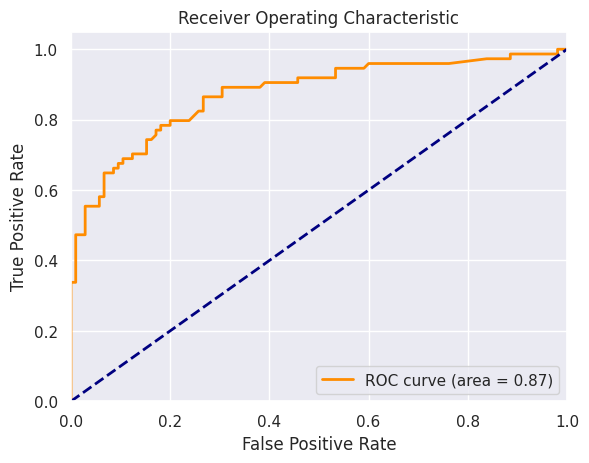

In [141]:
#display roc curve
#what do you notice ?
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()